# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_study = pd.merge(study_results, mouse_metadata, how="left")

# Display the data table for preview
combined_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [55]:
# Checking the number of mice.
mice_count = len(mouse_metadata["Mouse ID"])
mice_count

249

In [56]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_study[combined_mouse_study.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [57]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_mouse_study.loc[combined_mouse_study["Mouse ID"] == "g989", :]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = combined_mouse_study.loc[combined_mouse_study["Mouse ID"] != "g989"]
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [59]:
# Checking the number of mice in the clean DataFrame.
number_mice_count = clean_mouse_data["Mouse ID"].value_counts()
number_mice_count

Mouse ID
b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: count, Length: 248, dtype: int64

## Summary Statistics

In [60]:
clean_mouse_data.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
stat_summary_df = clean_mouse_data.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tum_vol_mean = stat_summary_df["Tumor Volume (mm3)"].mean()
tum_vol_med = stat_summary_df["Tumor Volume (mm3)"].median()
tum_vol_var = stat_summary_df["Tumor Volume (mm3)"].var()
tum_vol_std = stat_summary_df["Tumor Volume (mm3)"].std()
tum_vol_sem = stat_summary_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_volume_df = pd.DataFrame ({ "Tumor Volume Mean": tum_vol_mean,
                                 "Tumor Volume Median": tum_vol_med,
                                 "Tumor Volume Variance": tum_vol_var,
                                 "Tumor Volume Std. Dev.": tum_vol_std,
                                 "Tumor Volume Std. Err.": tum_vol_sem
})
tumor_volume_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [62]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

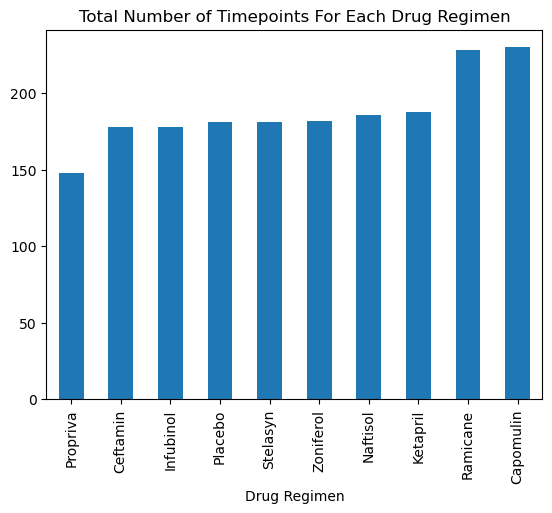

In [63]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_study = clean_mouse_data.groupby(["Drug Regimen"])["Timepoint"].count()
mice_study.sort_values(ascending=True).plot.bar()
plt.title("Total Number of Timepoints For Each Drug Regimen")
plt.show()

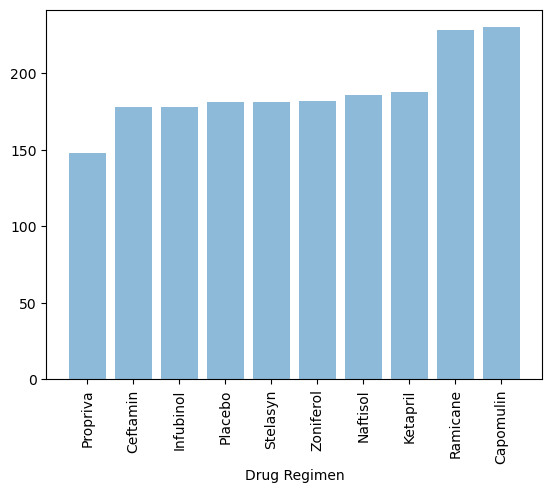

In [64]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_study2 = mice_study.sort_values(ascending=True)
plt.bar(mice_study2.index, mice_study2.values, alpha=0.50, align="center")
plt.xlabel ("Drug Regimen")
plt.xticks(rotation="vertical")

plt.show()

In [65]:
gen_distribution = clean_mouse_data.loc[:, ["Sex"]]
gen_distribution

,Sex
0,Female
1,Male
2,Female
3,Female
4,Male
...,...
1888,Male
1889,Male
1890,Female
1891,Female


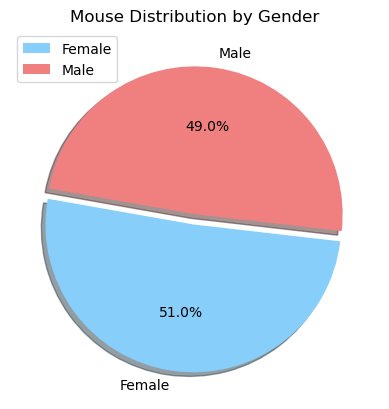

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gen_distribution = clean_mouse_data.loc[:, ["Sex"]]

labels = ["Female", "Male"]
gender = gen_distribution["Sex"].value_counts()
colors = ["lightskyblue", "lightcoral"]
explode = (0.07,0)

gender_count = plt.pie(gender, labels=labels, colors=colors, explode=explode,
                            autopct="%1.1f%%", shadow=True, startangle= 170)
plt.legend(loc="upper left")
plt.title("Mouse Distribution by Gender")

plt.show()


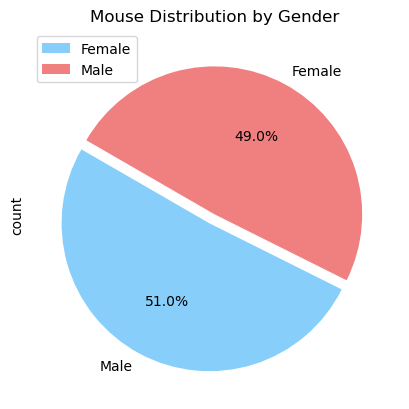

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plot = gender.plot(kind="pie", colors=colors, title= "Mouse Distribution by Gender", explode=explode, startangle=150, autopct="%1.1f%%")
gender_plot.legend(["Female", "Male"], loc="upper left")
plt.show()

## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_ID = combined_mouse_study.groupby("Mouse ID")
greatest_tp = group_ID["Timepoint"].max()
greatest_tp = greatest_tp.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_tp_vol = greatest_tp.merge(combined_mouse_study, on= ["Mouse ID", "Timepoint"], how= "left")
greatest_tp_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [69]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = greatest_tp_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
quartiles

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lowerbound  = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)

print(f"Values below {lowerbound} could be outliers.")
print(f"Values above {upperbound} could be outliers.")


The lower quartile of Tumor Volume (mm3) is: 45.93471217
The upper quartile of Tumor Volume (mm3) is: 64.95756185
The interquartile range of Tumor Volume (mm3) is: 19.022849680000007
The the median of Tumor Volume (mm3) is: 55.84141007 
Values below 17.400437649999986 could be outliers.
Values above 93.49183637000002 could be outliers.


In [70]:
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_regimens:
    tumor_by_drug = greatest_tp_vol.loc[greatest_tp_vol["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol.append(tumor_by_drug)    
    print(tumor_vol)
    
    # add subset 

    

[19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64]
[19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64, 6      38.407618
7      43.047543
10     38.810366
12     32.978

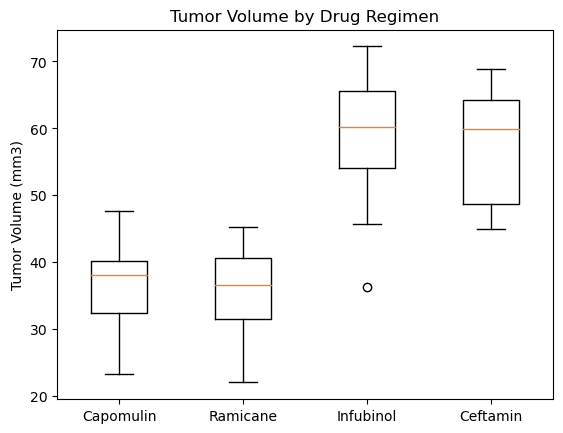

In [71]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
x = [1,2,3,4]
ax1.set_title("Tumor Volume by Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_vol)
plt.xticks(x, drug_regimens)
plt.show()


## Line and Scatter Plots

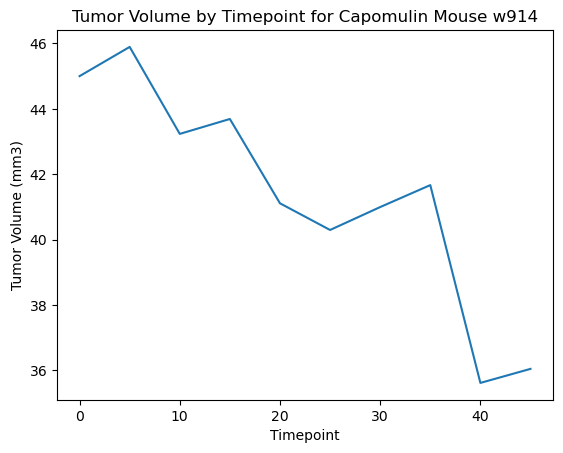

In [89]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

cap_mouse = combined_mouse_study.loc[combined_mouse_study["Mouse ID"] == "w914"]

cap_timepoint = cap_mouse["Timepoint"]
cap_volume = cap_mouse["Tumor Volume (mm3)"]

x_axis = np.arange(0,45,5)

plt.plot(cap_timepoint, cap_volume)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume by Timepoint for Capomulin Mouse w914")
plt.show()


In [90]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

cap_regimen = combined_mouse_study.loc[combined_mouse_study["Drug Regimen"] == "Capomulin"]
avg_volume = cap_regimen.groupby(["Mouse ID"]).mean()

avg_tumor_vol = avg_volume["Tumor Volume (mm3)"]
avg_weight = avg_volume["Weight (g)"]

plt.scatter(avg_weight, avg_tumor_vol, marker="D", facecolors= "black", edgecolors="magenta", s=120, alpha=0.50)

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Average Tumor Volume vs. Mouse Weight")
plt.show()


TypeError: Could not convert CapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulin to numeric

## Correlation and Regression

In [74]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


